#### This project will use feature engineering and date time series in python to answer a series  of questions. 

##### Questions
1) Comparing Police Districts:
 - Which district has the most crimes? 
 - Which has the least?
2) Crimes Across the Years:
 - Are crimes increasing or decreasing across the years?
 - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
3) Comparing AM vs. PM Rush Hour:
 - Are crimes more common during AM rush hour or PM rush hour?
  - What are the top 5 most common crimes during AM rush hour? 
  - What are the top 5 most common crimes during PM rush hour?
 - Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
4) Comparing Months:
 - What months have the most crime? 
 - What months have the least?
 - Are there any individual crimes that do not follow this pattern? If so, which crimes?
5) Comparing Holidays:
 - Are there any holidays that show an increase in the # of crimes?
 - Are there any holidays that show a decrease in the # of crimes?



# Create project

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns

# tools for project
import os,glob
import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

# import warning
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format


In [2]:
# Get data file names
path = "Data/Chicago"
filenames = glob.glob(path + "/*.csv")


In [3]:
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [4]:
# Concatenate all data into one DataFrame
crime = pd.concat(dfs, ignore_index=True)


In [5]:
# check the data loaded
crime.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,NaN,41.94,-87.65
1,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.00,NaN,41.95,-87.71
2,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68
4,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68


# Prepare data

In [6]:
##check nulls before coercing errors
crime.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10359
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Latitude                 86751
Longitude                86751
dtype: int64

In [7]:
## saving a copy of original datetime column
crime['Date_orig'] = crime['Date'].copy()
crime

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date_orig
0,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,NaN,41.94,-87.65,01/01/2001 01:00:00 AM
1,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.00,NaN,41.95,-87.71,01/01/2001 01:00:00 AM
2,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74,01/01/2001 01:00:00 PM
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68,01/01/2001 01:00:00 AM
4,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68,01/01/2001 01:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782455,13045687,04/18/2023 12:50:00 AM,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1214,12.00,27.00,41.89,-87.65,04/18/2023 12:50:00 AM
7782456,13046438,04/18/2023 12:51:00 PM,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,1932,19.00,43.00,41.93,-87.66,04/18/2023 12:51:00 PM
7782457,13046101,04/18/2023 12:52:00 PM,ASSAULT,SIMPLE,STREET,False,False,1011,10.00,24.00,41.86,-87.72,04/18/2023 12:52:00 PM
7782458,13046082,04/18/2023 12:55:00 PM,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1923,19.00,46.00,41.95,-87.65,04/18/2023 12:55:00 PM


In [8]:
## Using errors = "coerce"
crime["Date_coerce"] = pd.to_datetime(crime["Date"], errors='coerce')
crime["Date_coerce"]

0         2001-01-01 01:00:00
1         2001-01-01 01:00:00
2         2001-01-01 13:00:00
3         2001-01-01 01:00:00
4         2001-01-01 01:00:00
                  ...        
7782455   2023-04-18 00:50:00
7782456   2023-04-18 12:51:00
7782457   2023-04-18 12:52:00
7782458   2023-04-18 12:55:00
7782459   2023-04-18 00:55:00
Name: Date_coerce, Length: 7782460, dtype: datetime64[ns]

In [9]:
## How many null values did we create?
crime.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10359
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Latitude                 86751
Longitude                86751
Date_orig                    0
Date_coerce                  0
dtype: int64

In [10]:
## What % of dates became null?
crime.isna().sum()/len(crime)

ID                     0.00
Date                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Latitude               0.01
Longitude              0.01
Date_orig              0.00
Date_coerce            0.00
dtype: float64

In [11]:
## inspecting just the bad rows
bad_rows = crime[crime['Date_coerce'].isna()]
bad_rows

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date_orig,Date_coerce


In [12]:
# convert bad rows
try:
    pd.to_datetime(bad_rows['Date_orig'])
except Exception as e:
    display(e)

#### There were no bad rows but it is possible

In [13]:
## use the fixed-datetime column to make the datetime col
crime['datetime'] = pd.to_datetime(crime["Date_orig"])
crime

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date_orig,Date_coerce,datetime
0,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,NaN,41.94,-87.65,01/01/2001 01:00:00 AM,2001-01-01 01:00:00,2001-01-01 01:00:00
1,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.00,NaN,41.95,-87.71,01/01/2001 01:00:00 AM,2001-01-01 01:00:00,2001-01-01 01:00:00
2,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74,01/01/2001 01:00:00 PM,2001-01-01 13:00:00,2001-01-01 13:00:00
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68,01/01/2001 01:00:00 AM,2001-01-01 01:00:00,2001-01-01 01:00:00
4,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68,01/01/2001 01:00:00 AM,2001-01-01 01:00:00,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782455,13045687,04/18/2023 12:50:00 AM,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1214,12.00,27.00,41.89,-87.65,04/18/2023 12:50:00 AM,2023-04-18 00:50:00,2023-04-18 00:50:00
7782456,13046438,04/18/2023 12:51:00 PM,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,1932,19.00,43.00,41.93,-87.66,04/18/2023 12:51:00 PM,2023-04-18 12:51:00,2023-04-18 12:51:00
7782457,13046101,04/18/2023 12:52:00 PM,ASSAULT,SIMPLE,STREET,False,False,1011,10.00,24.00,41.86,-87.72,04/18/2023 12:52:00 PM,2023-04-18 12:52:00,2023-04-18 12:52:00
7782458,13046082,04/18/2023 12:55:00 PM,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1923,19.00,46.00,41.95,-87.65,04/18/2023 12:55:00 PM,2023-04-18 12:55:00,2023-04-18 12:55:00


In [14]:
#check the dataframe info
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7782460 entries, 0 to 7782459
Data columns (total 15 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  Date_orig             object        
 13  Date_coerce           datetime64[ns]
 14  datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 786.7+ MB


## Set date time as index

In [15]:
# make index
crime_ts = crime.set_index('datetime')
crime_ts

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date_orig,Date_coerce
datetime,,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,NaN,41.94,-87.65,01/01/2001 01:00:00 AM,2001-01-01 01:00:00
2001-01-01 01:00:00,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.00,NaN,41.95,-87.71,01/01/2001 01:00:00 AM,2001-01-01 01:00:00
2001-01-01 13:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74,01/01/2001 01:00:00 PM,2001-01-01 13:00:00
2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68,01/01/2001 01:00:00 AM,2001-01-01 01:00:00
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68,01/01/2001 01:00:00 AM,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18 00:50:00,13045687,04/18/2023 12:50:00 AM,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1214,12.00,27.00,41.89,-87.65,04/18/2023 12:50:00 AM,2023-04-18 00:50:00
2023-04-18 12:51:00,13046438,04/18/2023 12:51:00 PM,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,1932,19.00,43.00,41.93,-87.66,04/18/2023 12:51:00 PM,2023-04-18 12:51:00
2023-04-18 12:52:00,13046101,04/18/2023 12:52:00 PM,ASSAULT,SIMPLE,STREET,False,False,1011,10.00,24.00,41.86,-87.72,04/18/2023 12:52:00 PM,2023-04-18 12:52:00


In [16]:
#drop unneeded columns
dt_cols = [c for c in crime_ts.columns if 'Date' in c]
crime_ts = crime_ts.drop(columns=dt_cols)
crime_ts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
datetime,,,,,,,,,,,
2001-01-01 01:00:00,1309918,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,NaN,41.94,-87.65
2001-01-01 01:00:00,1311049,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.00,NaN,41.95,-87.71
2001-01-01 13:00:00,1310741,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,NaN,42.01,-87.68
2001-01-01 01:00:00,1311226,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18 00:50:00,13045687,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1214,12.00,27.00,41.89,-87.65
2023-04-18 12:51:00,13046438,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,1932,19.00,43.00,41.93,-87.66
2023-04-18 12:52:00,13046101,ASSAULT,SIMPLE,STREET,False,False,1011,10.00,24.00,41.86,-87.72


In [17]:
# check the index to confirm its datetime
crime_ts.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 13:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2023-04-18 12:38:00', '2023-04-18 00:39:00',
               '2023-04-18 00:40:00', '2023-04-18 12:45:00',
               '2023-04-18 12:48:00', '2023-04-18 00:50:00',
               '2023-04-18 12:51:00', '2023-04-18 12:52:00',
               '2023-04-18 12:55:00', '2023-04-18 00:55:00'],
              dtype='datetime64[ns]', name='datetime', length=7782460, freq=None)

In [18]:
crime_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7782460 entries, 2001-01-01 01:00:00 to 2023-04-18 00:55:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 608.6+ MB


In [19]:
## Drop extra columns not needed
drop_cols = ['Longitude','Latitude','ID','Ward']
chicrime_ts = crime_ts.drop(columns=drop_cols)
chicrime_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7782460 entries, 2001-01-01 01:00:00 to 2023-04-18 00:55:00
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Primary Type          object 
 1   Description           object 
 2   Location Description  object 
 3   Arrest                bool   
 4   Domestic              bool   
 5   Beat                  int64  
 6   District              float64
dtypes: bool(2), float64(1), int64(1), object(3)
memory usage: 371.1+ MB


## Feature Engineering for Questions

In [20]:
## making eda_df with date as a column instead of index
eda_df = chicrime_ts.reset_index()
eda_df

,datetime,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District
0,2001-01-01 01:00:00,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00
1,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.00
2,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00
3,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00
4,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00
...,...,...,...,...,...,...,...,...
7782455,2023-04-18 00:50:00,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1214,12.00
7782456,2023-04-18 12:51:00,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,1932,19.00
7782457,2023-04-18 12:52:00,ASSAULT,SIMPLE,STREET,False,False,1011,10.00
7782458,2023-04-18 12:55:00,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1923,19.00


In [21]:
## feature engineering for dates
eda_df['year'] = eda_df['datetime'].dt.year
eda_df['month'] = eda_df['datetime'].dt.month_name()
eda_df['day of month'] = eda_df['datetime'].dt.day
eda_df['day of week'] = eda_df['datetime'].dt.day_name()
eda_df['hour'] = eda_df['datetime'].dt.hour
eda_df['Month']=eda_df['datetime'].dt.month
eda_df

,datetime,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,year,month,day of month,day of week,hour,Month
0,2001-01-01 01:00:00,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,2001,January,1,Monday,1,1
1,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.00,2001,January,1,Monday,1,1
2,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,2001,January,1,Monday,13,1
3,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,2001,January,1,Monday,1,1
4,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,2001,January,1,Monday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782455,2023-04-18 00:50:00,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1214,12.00,2023,April,18,Tuesday,0,4
7782456,2023-04-18 12:51:00,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,1932,19.00,2023,April,18,Tuesday,12,4
7782457,2023-04-18 12:52:00,ASSAULT,SIMPLE,STREET,False,False,1011,10.00,2023,April,18,Tuesday,12,4
7782458,2023-04-18 12:55:00,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1923,19.00,2023,April,18,Tuesday,12,4


In [22]:
## Making eda_ts with dt index
eda_ts = eda_df.set_index('datetime')

# Question 1: Most and least crimes by District

In [63]:

# convert "Fee" from float to int and replace NaN values
eda_df['District'] = eda_df['District'].fillna(0).astype(int)
eda_df['District'].value_counts()

8     523043
11    499677
6     454986
7     450331
25    442764
4     441880
3     394721
12    385552
9     380267
2     368251
18    349212
19    349204
5     344925
10    335309
15    333690
1     314481
14    301201
16    260381
22    255086
24    235004
17    224643
20    137567
31       234
0         47
21         4
Name: District, dtype: int64

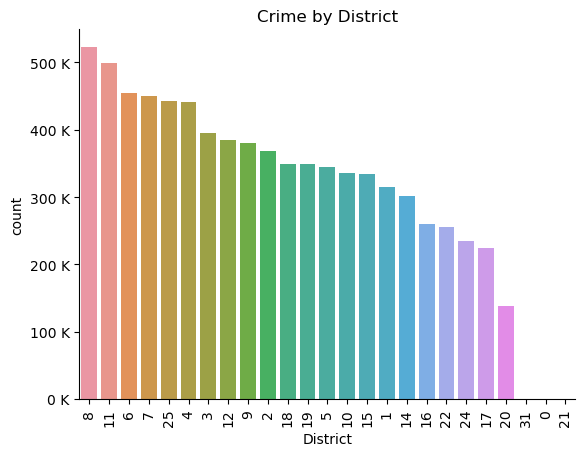

In [66]:
ax =sns.countplot(data = eda_df, 
              x = "District",
             order = eda_df["District"].value_counts().index)
ax.set(title = "Crime by District")
# setting y axis to display in thousands
from matplotlib.ticker import FuncFormatter
def hundred_k(x, pos):
    return f'{x*1e-3:,.0f} K'
count_fmt_100k = FuncFormatter(hundred_k)
ax.yaxis.set_major_formatter(count_fmt_100k)

#format x labels
plt.xticks(rotation = 90)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('Images/Crime by District', bbox_inches='tight')

#plt.show()

###  Results
- District 8 has the most crimes with 523,043 crimes
- District 21 has the least crimes with 4 crimes. 

# Question 2:  Crime Across Years

In [67]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7782460 entries, 0 to 7782459
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   datetime              datetime64[ns]
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              int32         
 8   year                  int64         
 9   month                 object        
 10  day of month          int64         
 11  day of week           object        
 12  hour                  int64         
 13  Month                 int64         
dtypes: bool(2), datetime64[ns](1), int32(1), int64(5), object(5)
memory usage: 697.7+ MB


In [68]:
eda_df.head(2)


,datetime,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,year,month,day of month,day of week,hour,Month
0,2001-01-01 01:00:00,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19,2001,January,1,Monday,1,1
1,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17,2001,January,1,Monday,1,1


In [69]:
#set up df
totalcrimes = eda_df.copy()
#Setting date as index
totalcrimes = totalcrimes.set_index("datetime")


In [70]:
#resert index
totalcrimes["Year"] = totalcrimes.index.year


In [74]:
#get count
totalcrimes['Year'].value_counts().sort_values()


2023     71010
2021    208565
2020    212088
2022    238159
2019    261244
2015    264755
2018    268770
2017    269069
2016    269786
2014    275731
2013    307468
2012    336261
2011    351963
2010    370496
2009    392819
2008    427167
2007    437084
2006    448174
2005    453771
2004    469421
2003    475979
2001    485878
2002    486802
Name: Year, dtype: int64

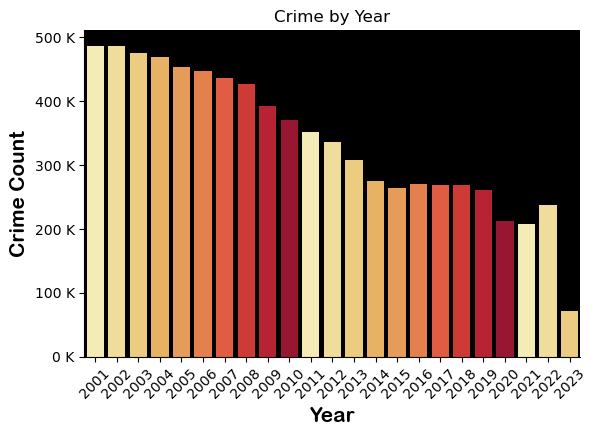

In [71]:
#visual
sequential_colors = sns.color_palette("YlOrRd", 10)
sns.set_style(rc = {'axes.facecolor': 'black'})


ax = sns.countplot(data=totalcrimes, x='Year', palette=sequential_colors)
ax.set(title = "Crime by Year")

#set formatting
plt.xlabel('Year', fontfamily='Arial Rounded MT Bold', fontsize = 15)
plt.ylabel('Crime Count', fontfamily='Arial Rounded MT Bold', fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')

# setting y axis to display in thousands
from matplotlib.ticker import FuncFormatter
def hundred_k(x, pos):
    return f'{x*1e-3:,.0f} K'
count_fmt_100k = FuncFormatter(hundred_k)
ax.yaxis.set_major_formatter(count_fmt_100k)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
fig.autofmt_xdate(rotation = 45, ha = "center")

plt.savefig('Images/Crime by Year', bbox_inches='tight')



### Results

#### Crimes  show a downward trend but the year with highest number of crimes was 2002. 

#  Question 4: Months
- What months have the most crime?
- What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [131]:
## Resampling to Monthly data
ts = eda_ts.resample("M").size().loc['2001':]
ts

datetime
2001-01-31    38120
2001-02-28    33785
2001-03-31    40566
2001-04-30    40090
2001-05-31    41836
              ...  
2022-12-31    19749
2023-01-31    20795
2023-02-28    18130
2023-03-31    20153
2023-04-30    11932
Freq: M, Length: 268, dtype: int64

In [132]:
## resample to correct freq
ts = eda_ts.resample("M").size()

In [133]:
#create variable
date_most_crimes = ts.idxmax()
date_most_crimes

Timestamp('2002-07-31 00:00:00', freq='M')

In [134]:
ts.loc[date_most_crimes]

46013

In [135]:
# Which Months have  the highest crime and lowest crime
eda_ts['month'].value_counts()

July         717108
August       710287
May          682815
June         681638
October      676121
September    668085
March        649749
April        638999
January      621854
November     608810
December     579558
February     547436
Name: month, dtype: int64

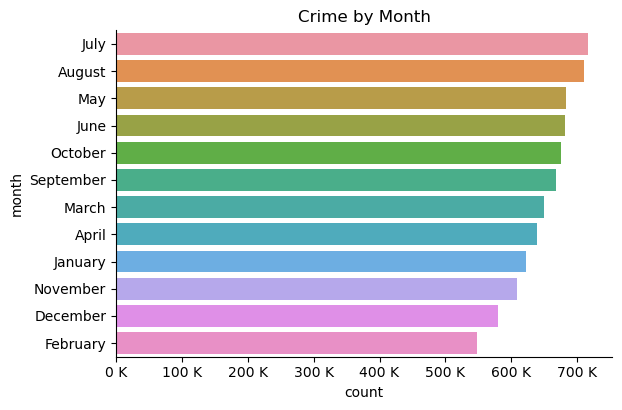

In [143]:
ax =sns.countplot(data = eda_ts, 
              y = "month",
             order = eda_df["month"].value_counts().index)
#format x labels
plt.xticks(rotation = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(title = "Crime by Month")

count_fmt_100k = FuncFormatter(hundred_k)
ax.xaxis.set_major_formatter(count_fmt_100k)


fig = ax.get_figure()
fig.autofmt_xdate(rotation = 0, ha = "center")
plt.savefig('Images/Crime by Month', bbox_inches='tight')

#### July has the highest amount of crimes.
#### February has the lowest amount of crimes.

In [86]:
# look at all the types of crimes
eda_df['Primary Type'].value_counts()

THEFT                                1641632
BATTERY                              1422561
CRIMINAL DAMAGE                       887040
NARCOTICS                             747579
ASSAULT                               507107
OTHER OFFENSE                         483513
BURGLARY                              424346
MOTOR VEHICLE THEFT                   375279
DECEPTIVE PRACTICE                    344756
ROBBERY                               292255
CRIMINAL TRESPASS                     214276
WEAPONS VIOLATION                     106348
PROSTITUTION                           69837
OFFENSE INVOLVING CHILDREN             55696
PUBLIC PEACE VIOLATION                 52314
SEX OFFENSE                            30664
CRIM SEXUAL ASSAULT                    27632
INTERFERENCE WITH PUBLIC OFFICER       18388
LIQUOR LAW VIOLATION                   14900
GAMBLING                               14618
ARSON                                  13246
HOMICIDE                               12545
KIDNAPPING

In [87]:
# find the individual crimes by month
crime_month= eda_df.groupby("Primary Type")['Month'].value_counts().sort_index()
crime_month

Primary Type       Month
ARSON              1         963
                   2         840
                   3        1136
                   4        1119
                   5        1230
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9188
                   11       7951
                   12       7400
Name: Month, Length: 415, dtype: int64

In [88]:
crime_month_pattern =crime_month.to_frame("Number of Crimes")
print(crime_month_pattern)

                         Number of Crimes
Primary Type      Month                  
ARSON             1                   963
                  2                   840
                  3                  1136
                  4                  1119
                  5                  1230
...                                   ...
WEAPONS VIOLATION 8                  9887
                  9                  9435
                  10                 9188
                  11                 7951
                  12                 7400

[415 rows x 1 columns]


In [82]:
crime_month_pattern = crime_month_pattern.reset_index()

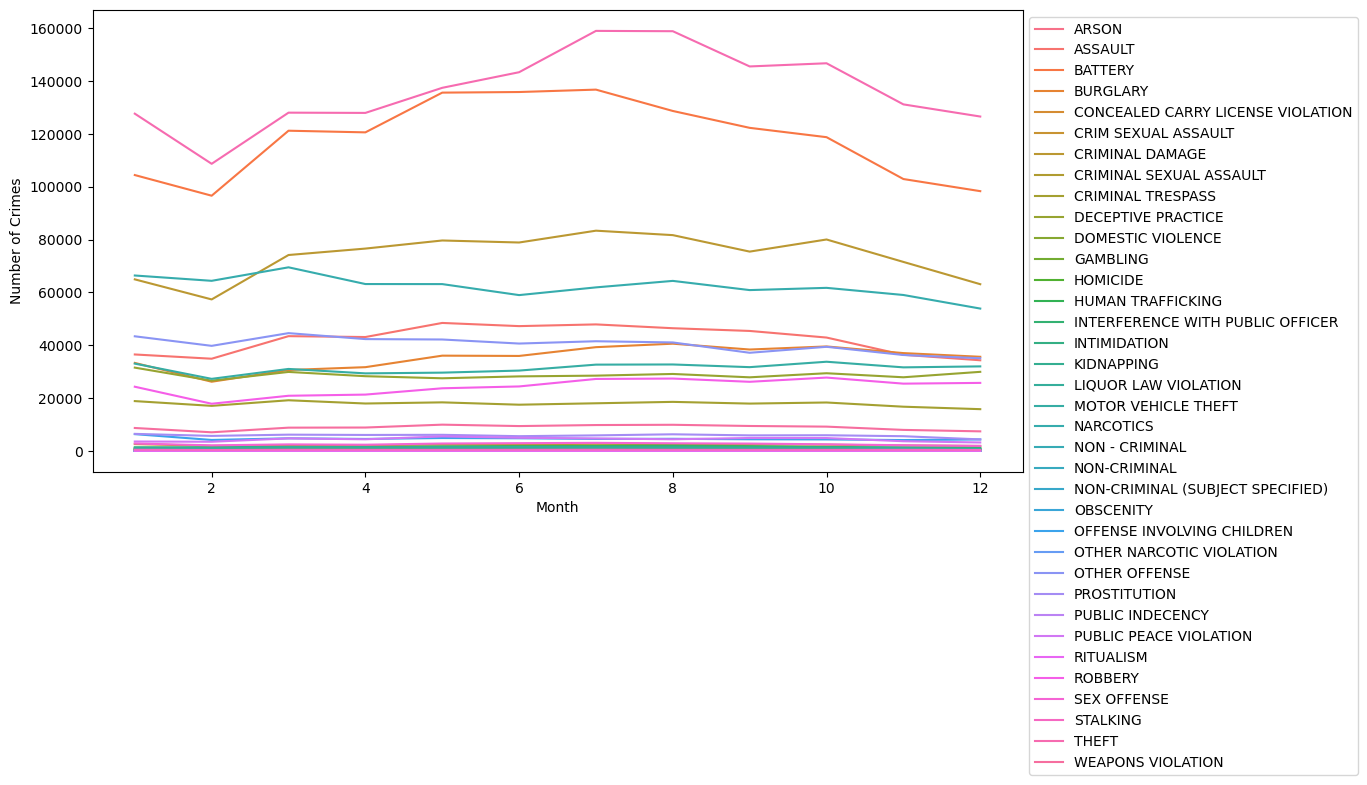

In [90]:
sns.set_style(rc = {'axes.facecolor': 'white'})

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=crime_month_pattern, x='Month',y='Number of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);
plt.savefig('Images/Crime by Month and Type', bbox_inches='tight')


### Burglary (highest in August), conceal carry (highest in September, lowest in January), sexual assault (highest in January, lowest in December), criminal trespass ( highest in March, lowest in Decemeber),  weapons violation, stalking sex offense

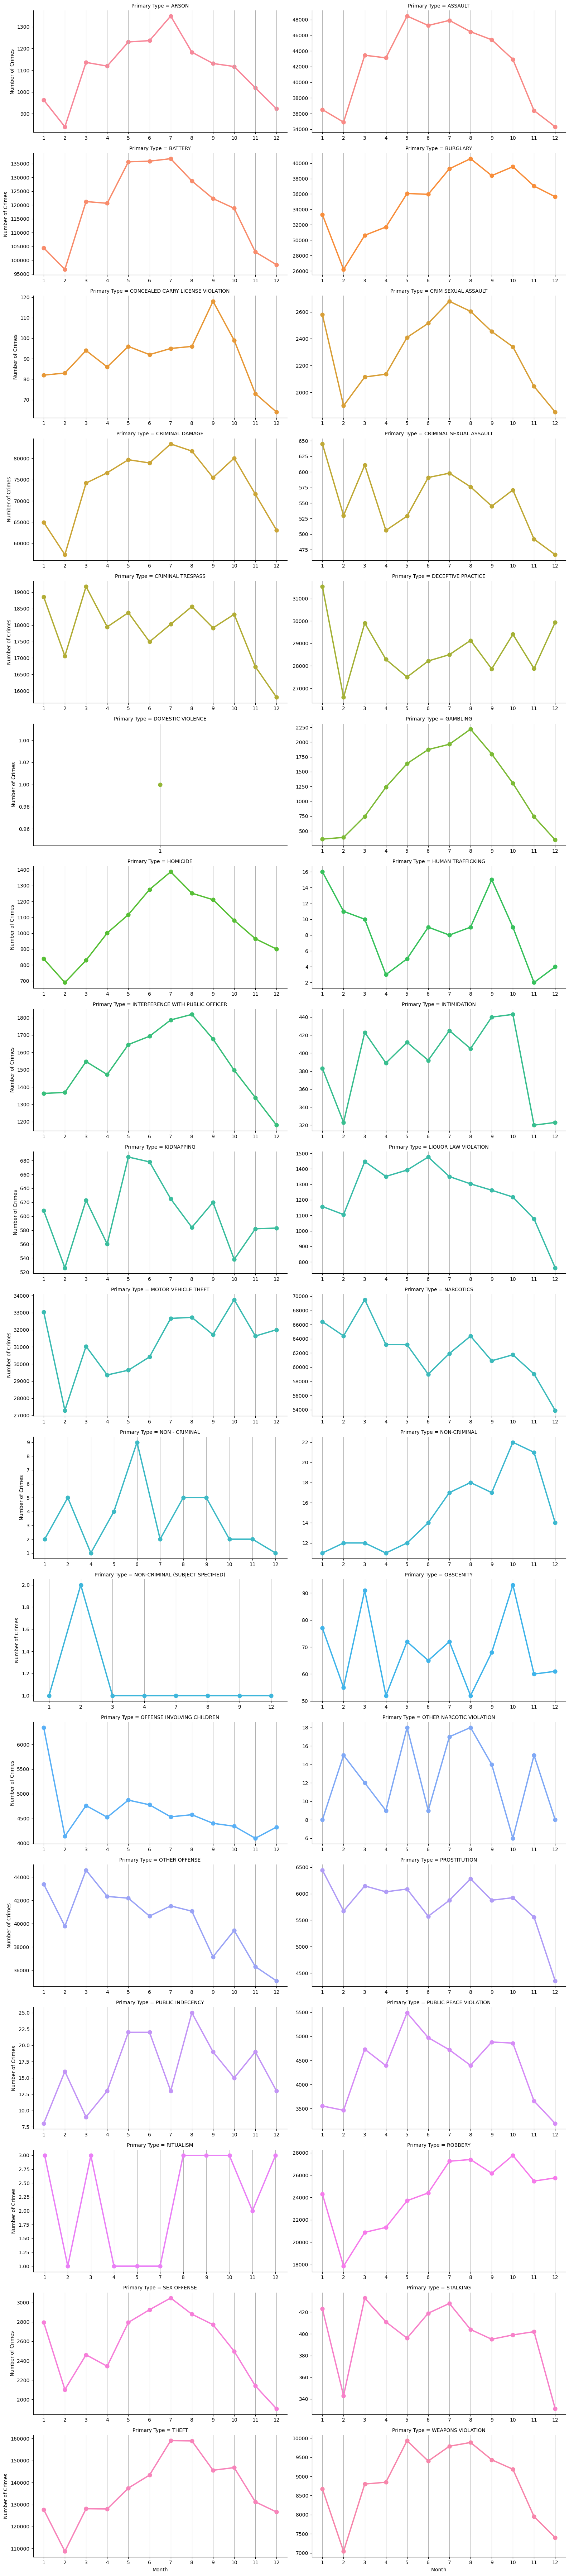

In [84]:
g = sns.catplot(data=crime_month_pattern, x='Month', 
                y='Number of Crimes',kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',
                col_wrap=2,sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

### Results

# Question 5: Comparing Holidays

In [112]:
!pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays

In [113]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7782460 entries, 0 to 7782459
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   datetime              datetime64[ns]
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   year                  int64         
 9   month                 object        
 10  day of month          int64         
 11  day of week           object        
 12  hour                  int64         
 13  Month                 int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 727.3+ MB


In [114]:
eda_df.head(3)

,datetime,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,year,month,day of month,day of week,hour,Month
0,2001-01-01 01:00:00,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,2001,January,1,Monday,1,1
1,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.00,2001,January,1,Monday,1,1
2,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,2001,January,1,Monday,13,1


In [115]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [116]:
## Saving both holiday types as columns
eda_df["US Holiday"] = eda_df['datetime'].map(us_holidays.get)
eda_df

,datetime,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,year,month,day of month,day of week,hour,Month,US Holiday
0,2001-01-01 01:00:00,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.00,2001,January,1,Monday,1,1,New Year's Day
1,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.00,2001,January,1,Monday,1,1,New Year's Day
2,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,2001,January,1,Monday,13,1,New Year's Day
3,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.00,2001,January,1,Monday,1,1,New Year's Day
4,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,2001,January,1,Monday,1,1,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782455,2023-04-18 00:50:00,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1214,12.00,2023,April,18,Tuesday,0,4,None
7782456,2023-04-18 12:51:00,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,1932,19.00,2023,April,18,Tuesday,12,4,None
7782457,2023-04-18 12:52:00,ASSAULT,SIMPLE,STREET,False,False,1011,10.00,2023,April,18,Tuesday,12,4,None
7782458,2023-04-18 12:55:00,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1923,19.00,2023,April,18,Tuesday,12,4,None


In [117]:
eda_df['US Holiday'].value_counts()

New Year's Day                                     33523
Independence Day                                   22664
Labor Day                                          22156
Memorial Day                                       21123
Columbus Day                                       20915
Veterans Day                                       20416
Martin Luther King Jr. Day                         18590
Washington's Birthday                              18224
Thanksgiving                                       14792
Christmas Day                                      12414
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5519
Christmas Day (Observed)                            4927
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1402
Name: US Holiday, dtype: int64

### Results

- New Year's Day shows an increase in crimes
- Juneteenth National Independence Day (Observed) shows a decrease in crimes. 

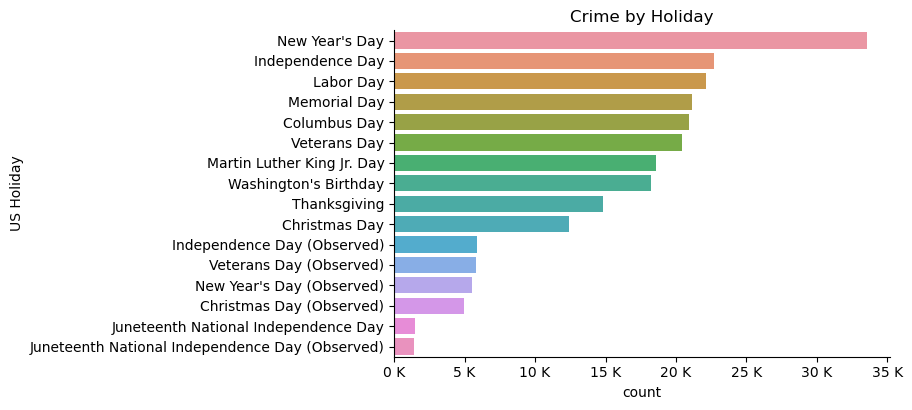

In [144]:
ax =sns.countplot(data = eda_df, 
              y = "US Holiday",
             order = eda_df["US Holiday"].value_counts().index)
#format x  and y labels
plt.xticks(rotation = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count_fmt_100k = FuncFormatter(hundred_k)
ax.xaxis.set_major_formatter(count_fmt_100k)

ax.set(title = "Crime by Holiday")
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 0, ha = "center")
plt.savefig('Images/Crime by Holiday', bbox_inches='tight')


# Rush Hour
Comparing AM vs. PM Rush Hour:
1. Are crimes more common during AM rush hour or PM rush hour?
2. What are the top 5 most common crimes during AM rush hour?
3. What are the top 5 most common crimes during PM rush hour?
4. Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [24]:
## resample to correct freq
rush = eda_ts.resample("H").size()

In [25]:
# Which Months have  the highest crime and lowest crime
eda_ts['hour'].value_counts()

12    446743
0     444105
19    438391
20    436863
18    425443
21    423763
22    416818
15    414245
17    399735
16    392899
14    392362
13    369458
23    346751
11    345092
9     336351
10    329872
8     263334
1     246758
2     208107
7     177798
3     168281
4     127907
6     124571
5     106813
Name: hour, dtype: int64

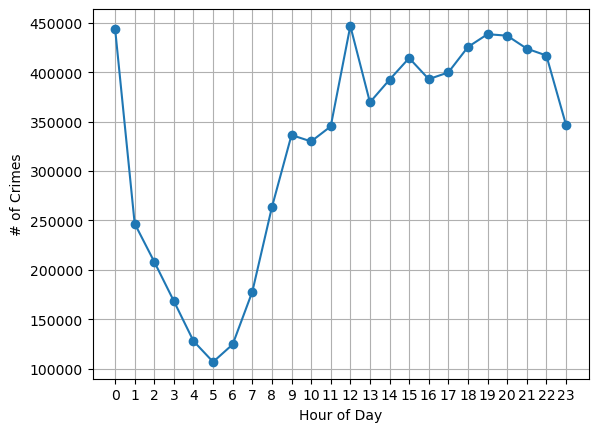

In [26]:
## save hour counts
hour_counts = eda_ts['hour'].value_counts().sort_index()
# year_counts = df.groupby("Year").size()
ax = hour_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Hour of Day',xticks=hour_counts.index);

- 7 AM - 10 AM as AM rush hour
- 4 -7 PM as PM rush hour.

In [30]:
## Engineering Features using components of the date/time
eda_ts['hour']  = eda_ts.index.hour

In [34]:
eda_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7782460 entries, 2001-01-01 01:00:00 to 2023-04-18 00:55:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Primary Type          object 
 1   Description           object 
 2   Location Description  object 
 3   Arrest                bool   
 4   Domestic              bool   
 5   Beat                  int64  
 6   District              float64
 7   year                  int64  
 8   month                 object 
 9   day of month          int64  
 10  day of week           object 
 11  hour                  int64  
 12  Month                 int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 727.3+ MB


In [38]:
# find the individual crimes by month
eda_rush= eda_df.groupby("Primary Type")['hour'].value_counts().sort_index()
eda_rush

Primary Type       hour
ARSON              0       1080
                   1       1075
                   2       1066
                   3        990
                   4        890
                           ... 
WEAPONS VIOLATION  19      7682
                   20      8390
                   21      8889
                   22      8834
                   23      8118
Name: hour, Length: 800, dtype: int64

In [39]:
hour_pattern =eda_rush.to_frame("Number of Crimes")
print(hour_pattern)

                        Number of Crimes
Primary Type      hour                  
ARSON             0                 1080
                  1                 1075
                  2                 1066
                  3                  990
                  4                  890
...                                  ...
WEAPONS VIOLATION 19                7682
                  20                8390
                  21                8889
                  22                8834
                  23                8118

[800 rows x 1 columns]


In [40]:
hour_pattern = hour_pattern.reset_index()

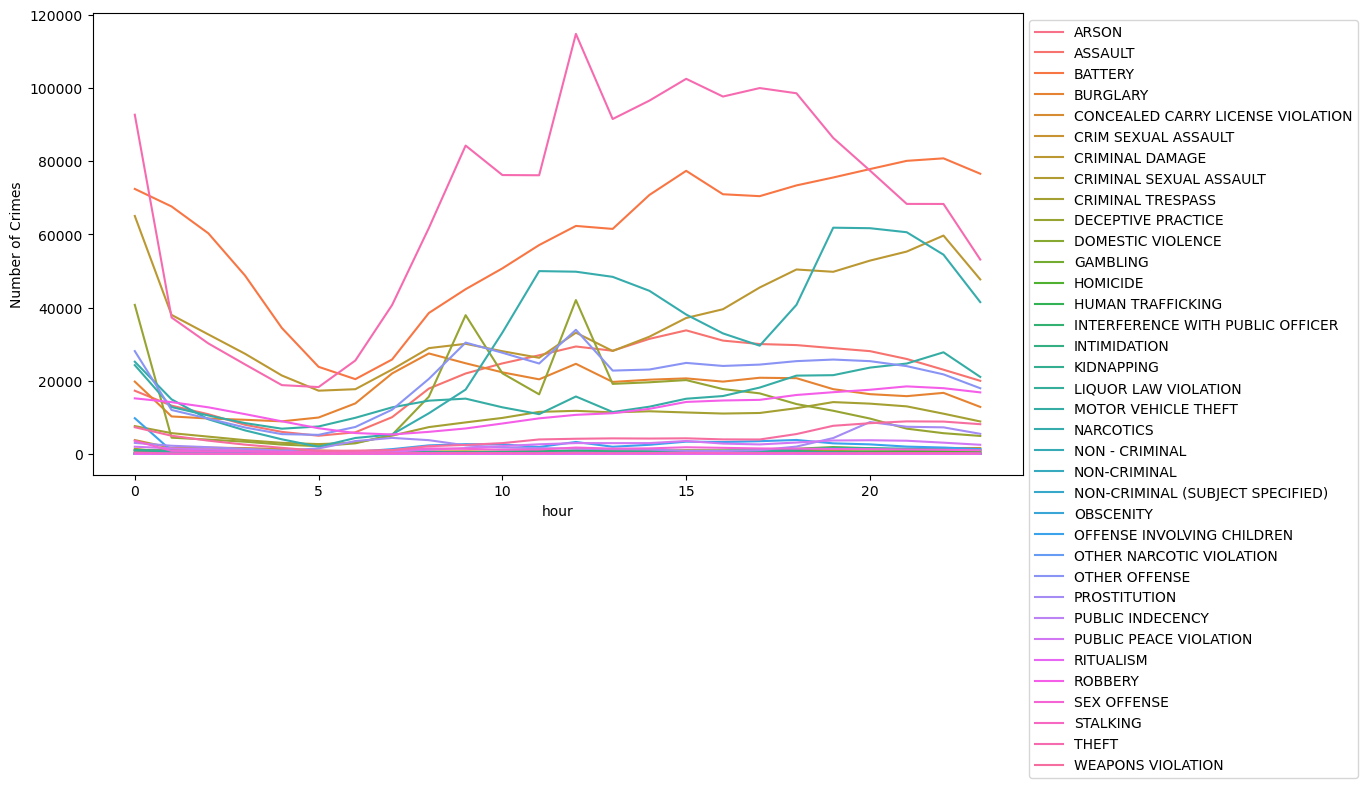

In [42]:
sns.set_style(rc = {'axes.facecolor': 'white'})

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=hour_pattern, x='hour',y='Number of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);
plt.savefig('Images/Crime by Hour and Type', bbox_inches='tight')

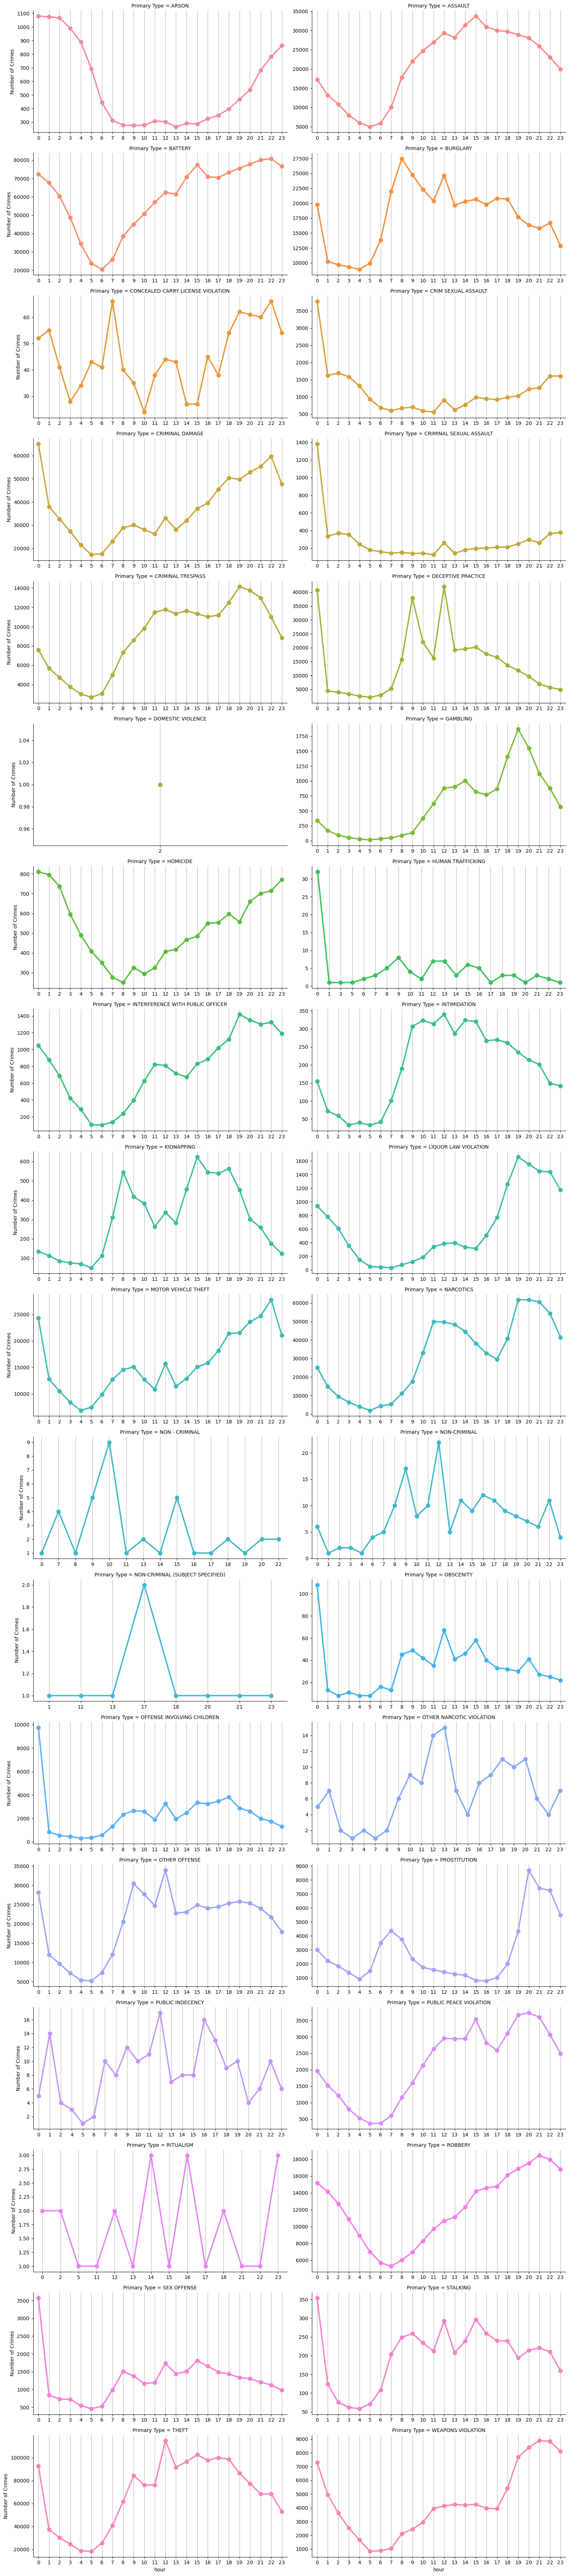

In [44]:
g = sns.catplot(data=hour_pattern, x='hour', 
                y='Number of Crimes',kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',
                col_wrap=2,sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

In [64]:
sorteddf=hour_pattern.sort_values('hour').groupby(['hour','Number of Crimes', 'Primary Type']).sum()
sorteddf.head()

Empty DataFrame
Columns: []
Index: [(0, 1, NON - CRIMINAL), (0, 2, RITUALISM), (0, 5, OTHER NARCOTIC VIOLATION), (0, 5, PUBLIC INDECENCY), (0, 6, NON-CRIMINAL)]

In [66]:
hour_pattern['Primary Type'].unique()

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER',
       'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION',
       'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON - CRIMINAL',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'], dtype=object)

In [72]:
hour_pattern.groupby('Primary Type').apply(lambda x: x.sort_values('Number of Crimes'))


Primary Type  hour  Number of Crimes
Primary Type                                                    
ARSON             13               ARSON    13               266
                  9                ARSON     9               276
                  8                ARSON     8               278
                  10               ARSON    10               278
                  15               ARSON    15               287
...                                  ...   ...               ...
WEAPONS VIOLATION 795  WEAPONS VIOLATION    19              7682
                  799  WEAPONS VIOLATION    23              8118
                  796  WEAPONS VIOLATION    20              8390
                  798  WEAPONS VIOLATION    22              8834
                  797  WEAPONS VIOLATION    21              8889

[800 rows x 3 columns]

### creating am and pm groups

In [43]:
## keeping data for am rush
eda_amrush = eda_ts.iloc[7:10].copy()

In [45]:
eda_amrush= eda_df.groupby("Primary Type")['hour'].value_counts().sort_index()
eda_amrush

Primary Type       hour
ARSON              0       1080
                   1       1075
                   2       1066
                   3        990
                   4        890
                           ... 
WEAPONS VIOLATION  19      7682
                   20      8390
                   21      8889
                   22      8834
                   23      8118
Name: hour, Length: 800, dtype: int64